# Objective : Task to predict the quality of wine

In this task we need to predict the quality of wine on the basis of other variables of the dataset like fixed acidity, citric acid, etc.

#### Importing necessary libraries for task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
wine = pd.read_csv('./Downloads/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Checking for the dimension, description and null values in the dataset

In [4]:
wine.shape

(1599, 12)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

By looking at the above we get to know that :
* data set contains 1599 rows and 12 columns
* we get to know mean , max, etc values of each column from the description
* There are no null values present in it.

#### EDA

At first we need to observe the target varibale (quality)

In [7]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


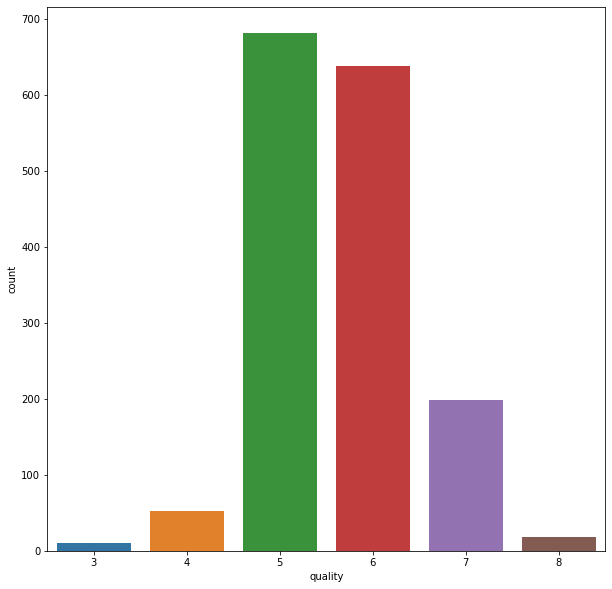

In [8]:
plt.figure(figsize= [10,10])
sns.countplot(wine['quality'])
plt.show()

By looking at the countplot of the quality column we can conclude that most number of wine present is with the wine quality 5 and by looking at the plot we can also conclude that the we cannot divide the quality of the wine into simmply good or bad.
We need to create a new column in which the grade of the wine is divided into three groups on the bases of its quality:
* wine with quality <= 3 has grade 1 (bad)
* wine with 3 < quality <= 7 has grade 2 (average)
* wine with quality > 7 has grade 3 (good)

In [9]:
grade = []
for i in wine['quality']:
    if i <= 3:
        grade.append('1')
    elif (i>3) and (i<=7):
        grade.append('2')
    else:
        grade.append('3')

In [10]:
wine['reviews'] = grade

1. fixed acidity

In [11]:
wine['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


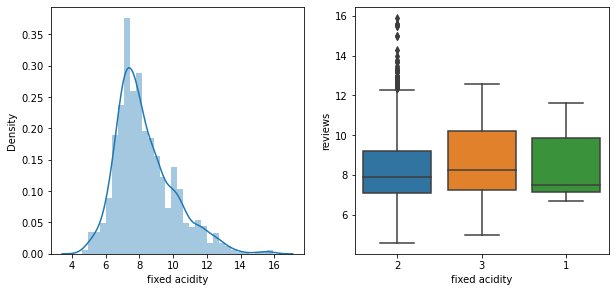

In [12]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['fixed acidity'])
plt.xlabel('fixed acidity')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'fixed acidity', data= wine)
plt.xlabel('fixed acidity')
plt.ylabel('reviews')
plt.show()

By looking at both the plots of fixed acidity we can conclude that the data is positively skewed and its density between 6 & 8 is the highest from the distplot and from the boxplot we can conclude that wine with the reviews 2 only has outliers present in it.

2. volatile acidity

In [13]:
wine['volatile acidity'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.52 , 0.935, 0.29 , 0.31 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.35 , 0.975,
       0.26 , 0.87 , 0.18 , 0.27 , 0.2  , 0.36 , 0.83 , 0.46 , 0.47 ,
       0.77 , 0.815, 0.795, 0.665, 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.315, 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585,
       0.915, 0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 ,
       1.01 , 0.305,

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


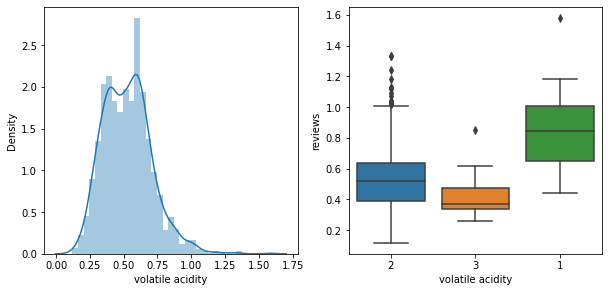

In [14]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['volatile acidity'])
plt.xlabel('volatile acidity')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'volatile acidity', data= wine)
plt.xlabel('volatile acidity')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of volatile acidity we can conclude that the data is mostly positively skewed and having the high density between 0.50 to 0.75 from the distplot and from the boxplot we can conclude that most number of outliers are present in the wine with the reviews 2 with some presence in 1 & 3.

3. citric acid

In [15]:
wine['citric acid'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


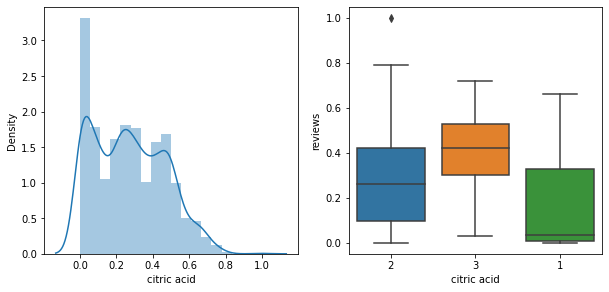

In [16]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['citric acid'])
plt.xlabel('citric acid')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'citric acid', data= wine)
plt.xlabel('citric acid')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of citric acid we can conclude that its plot line is showing multiple peak with slightly positively skewed and having high density of data between 0 and 0.2 from the distplot and from the boxplot we can conclude that the outliers are only present in wine with reviews 2.

4. residual sugar

In [17]:
wine['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


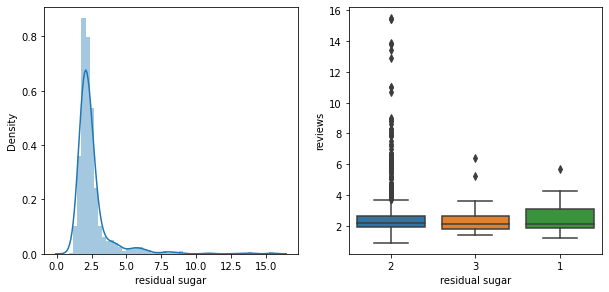

In [18]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['residual sugar'])
plt.xlabel('residual sugar')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'residual sugar', data= wine)
plt.xlabel('residual sugar')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of residual sugar we can conclude that the data is positively skewed with having high density close to 2.5 from the distplot and from the boxplot we can conclude that most number of outliers are present in the wine with the reviews 2 with having some presence in 1 and 3 too.

5. chlorides

In [19]:
wine['chlorides'].unique()

array([0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.073, 0.071, 0.097,
       0.089, 0.114, 0.176, 0.17 , 0.368, 0.086, 0.341, 0.077, 0.082,
       0.106, 0.084, 0.085, 0.08 , 0.105, 0.083, 0.103, 0.066, 0.172,
       0.074, 0.088, 0.332, 0.05 , 0.054, 0.113, 0.068, 0.081, 0.11 ,
       0.07 , 0.111, 0.079, 0.115, 0.094, 0.093, 0.104, 0.464, 0.401,
       0.062, 0.107, 0.045, 0.058, 0.102, 0.467, 0.091, 0.122, 0.09 ,
       0.119, 0.178, 0.146, 0.072, 0.118, 0.049, 0.06 , 0.117, 0.087,
       0.236, 0.61 , 0.095, 0.1  , 0.36 , 0.067, 0.27 , 0.099, 0.046,
       0.061, 0.056, 0.039, 0.059, 0.101, 0.057, 0.337, 0.078, 0.263,
       0.063, 0.611, 0.064, 0.096, 0.358, 0.343, 0.186, 0.112, 0.213,
       0.214, 0.121, 0.128, 0.052, 0.12 , 0.116, 0.109, 0.159, 0.124,
       0.174, 0.047, 0.127, 0.413, 0.152, 0.053, 0.055, 0.051, 0.125,
       0.2  , 0.171, 0.226, 0.25 , 0.108, 0.148, 0.143, 0.222, 0.157,
       0.422, 0.034, 0.387, 0.415, 0.243, 0.241, 0.19 , 0.132, 0.126,
       0.038, 0.044,

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


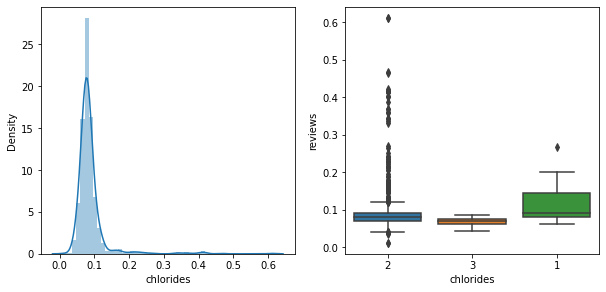

In [20]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['chlorides'])
plt.xlabel('chlorides')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'chlorides', data= wine)
plt.xlabel('chlorides')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of chlorides we can conclude that the data is positively skewed with having high density at around 0.07 or 0.08 from the distplot and from the boxplot we can conclude that most number of outliers are present in the wine with reviews 2 with some presence in wine with reviews 1 also.

6. free sulfur dioxide

In [21]:
wine['free sulfur dioxide'].unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


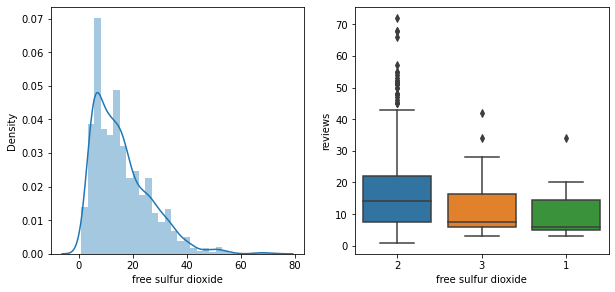

In [22]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['free sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'free sulfur dioxide', data= wine)
plt.xlabel('free sulfur dioxide')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of free sulfur dioxide we can conclude that the data is positively skewed with having highest desnsity of data between 4 and 7 from the distplot and from the boxplot we can conclude that maximum number of outliers are present in wine with reviews having 2 with presence of some outliers in the wine with reviews 1 and 3 too.

7. total sulfur dioxide

In [23]:
wine['total sulfur dioxide'].unique()

array([ 34. ,  67. ,  54. ,  60. ,  40. ,  59. ,  21. ,  18. , 102. ,
        65. ,  29. , 145. , 148. , 103. ,  56. ,  71. ,  37. ,  23. ,
        11. ,  35. ,  16. ,  82. , 113. ,  83. ,  50. ,  15. ,  30. ,
        19. ,  87. ,  46. ,  14. , 114. ,  12. ,  96. , 119. ,  73. ,
        45. ,  10. , 110. ,  52. , 112. ,  39. ,  27. ,  94. ,  43. ,
        42. ,  80. ,  51. ,  61. , 136. ,  31. , 125. ,  24. , 140. ,
       133. ,  85. , 106. ,  22. ,  36. ,  69. ,  64. , 153. ,  47. ,
       108. , 111. ,  62. ,  28. ,  89. ,  13. ,  90. , 134. ,  99. ,
        26. ,  63. , 105. ,  20. , 141. ,  88. , 129. , 128. ,  86. ,
       121. , 101. ,  44. ,   8. ,  49. ,  38. , 143. , 144. , 127. ,
       126. , 120. ,  55. ,  93. ,  95. ,  41. ,  58. ,  72. ,  81. ,
       109. ,  33. ,  53. ,  98. ,  48. ,  70. ,  25. , 135. ,  92. ,
        74. ,  32. ,  77. , 165. ,  75. , 124. ,  78. , 122. ,  66. ,
        68. ,  17. ,  91. ,  76. , 151. , 142. , 116. , 149. ,  57. ,
       104. ,  84. ,

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


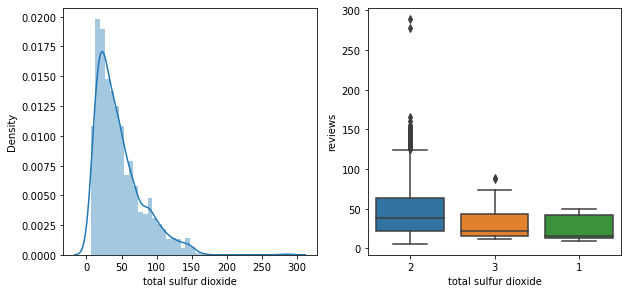

In [24]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['total sulfur dioxide'])
plt.xlabel('total sulfur dioxide')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'total sulfur dioxide', data= wine)
plt.xlabel('total sulfur dioxide')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of total sulfur dioxide we can conclude that the data is positively skewed with data having the highest density between 4 and 10 from the distplot and from the boxplot we can conclude that maximum number of outliers are present in the wine with reviews having 2 with the presence of outliers in the wine with the reviews having 3 also.

8. density

In [25]:
wine['density'].unique()

array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9986 , 0.9969 , 0.9982 , 0.9966 , 0.9955 ,
       0.9962 , 0.9972 , 0.9958 , 0.9993 , 0.9957 , 0.9975 , 0.994  ,
       0.9976 , 0.9934 , 0.9954 , 0.9971 , 0.9956 , 0.9983 , 0.9967 ,
       0.9961 , 0.9984 , 0.9938 , 0.9932 , 0.9965 , 0.9963 , 0.996  ,
       0.9973 , 0.9988 , 0.9937 , 0.9952 , 0.9916 , 0.9944 , 0.9996 ,
       0.995  , 0.9981 , 0.9953 , 0.9924 , 0.9948 , 0.99695, 0.99545,
       0.99615, 0.9994 , 0.99625, 0.99585, 0.99685, 0.99655, 0.99525,
       0.99815, 0.99745, 0.9927 , 0.99675, 0.99925, 0.99565, 1.00005,
       0.9985 , 0.99965, 0.99575, 0.9999 , 1.00025, 0.9987 , 0.99935,
       0.99735, 0.99915, 0.9991 , 1.00015, 0.9997 , 1.001  , 0.9979 ,
       1.0014 , 1.0001 , 0.99855, 0.99845, 0.9998 , 0.99645, 0.99865,
       0.9989 , 0.99975, 0.999  , 1.0015 , 1.0002 , 0.9992 , 1.0008 ,
       1.     , 1.0006 , 1.0004 , 1.0018 , 0.9912 , 1.0022 , 1.0003 ,
       0.9949 , 0.99

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


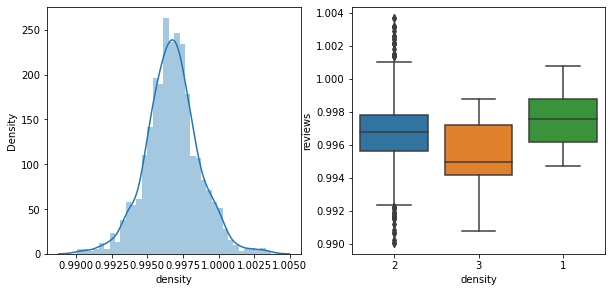

In [26]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['density'])
plt.xlabel('density')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'density', data= wine)
plt.xlabel('density')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of density wecan conclude that it is very difficult to assign skewness of the data with having highest density between 0.9950 and 0.9975 from the distplot and from the boxplot we can conclude that outliers are only present in the wine with the reviews having 2.

9. pH

In [27]:
wine['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


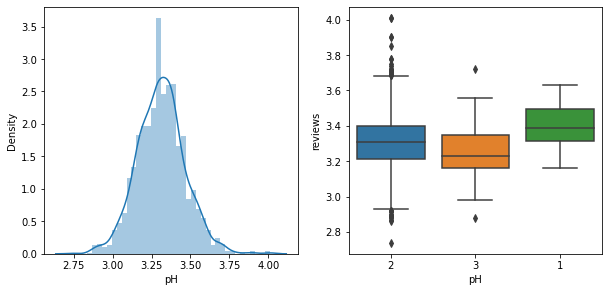

In [28]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['pH'])
plt.xlabel('pH')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'pH', data= wine)
plt.xlabel('pH')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of pH we can conclude that the data is slightly positively skewed with having highest density between 3.25 and 3.50 from the distplot and from the boxplot we can conclude the maximum number of outliers are present in the wine with the reviews having 2 with some presence of outliers in the wine with reviews having 3 also.

10. sulphates

In [29]:
wine['sulphates'].unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


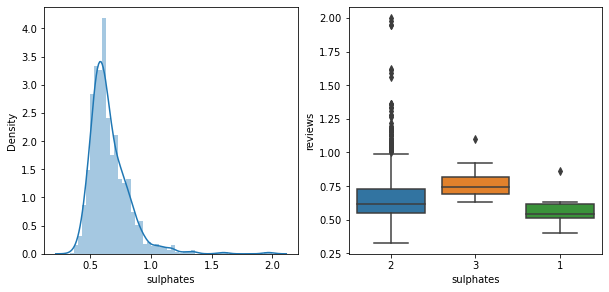

In [30]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['sulphates'])
plt.xlabel('sulphates')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'sulphates', data= wine)
plt.xlabel('sulphates')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of sulphates we can conclude that the data is positively skewed with having highest density around 0.7 from the distplot and from the boxplot we can conclude that maimum numbers of outliers are present in the wine with the reviews having 2 with the presence of some outliers in the wine with the reviews having 1 and 3 also.

11. alcohol

In [31]:
wine['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


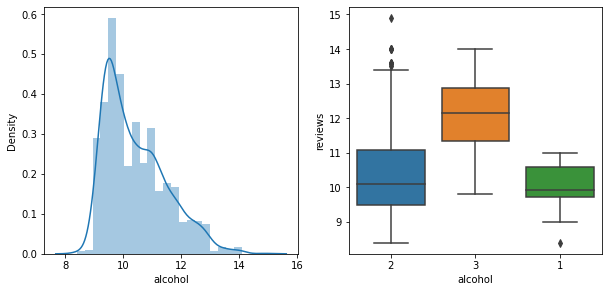

In [32]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['alcohol'])
plt.xlabel('alcohol')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'alcohol', data= wine)
plt.xlabel('alcohol')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of alcohol we can conclude the data is positively skewed with the data having highest density between 9 and 10 from the distplot and from the boxplot we can conclude that maximum number of outliers are present in the wine with reviews having 2 with presence of some outliers in the wine with reviews having 1 too.

12. quality

In [33]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


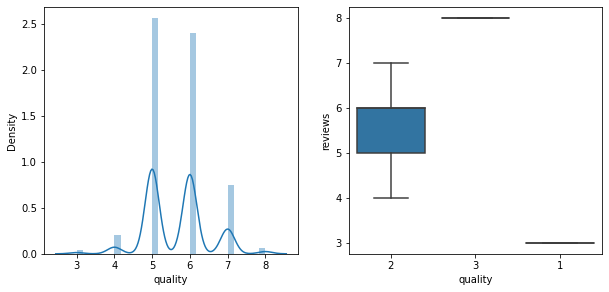

In [34]:
plt.figure(figsize= [10,10])
plt.subplot(221)
sns.distplot(wine['quality'])
plt.xlabel('quality')
plt.subplot(222)
sns.boxplot(x= 'reviews',y= 'quality', data= wine)
plt.xlabel('quality')
plt.ylabel('reviews')
plt.show()

By looking at both the graphs of quality we can conclude that we cannot determine the skewness of the data and it is having highest density at 5 and 6 from the distplot and from the boxplot we can conclude that there is no outliers present in any of the wine.

also we made the new target variable on the basis of the wine quality column to simplify the data and the new target column is reviews. 

#### Creating heatmap to observe the correlations of the dataset.

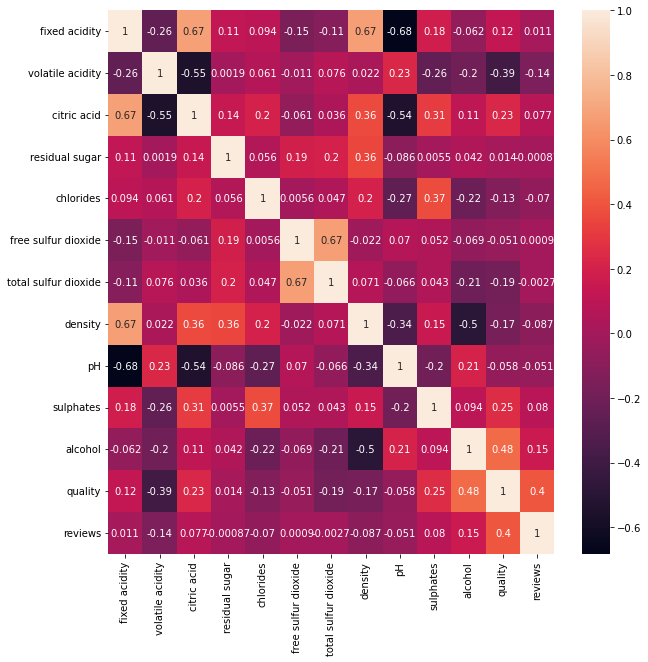

In [35]:
wine['reviews'] = pd.to_numeric(wine['reviews'])
plt.figure(figsize= [10,10])
sns.heatmap(wine.corr(), annot= True)
plt.show()

Heatmap shows that the target column (reviews) have positive high positive correlation with quality, alcohol and sulphates.

In [36]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier(criterion= 'entropy')
rfc = RandomForestClassifier(criterion= 'entropy')
sv = SVC()

In [37]:
X = wine.drop(['reviews'], axis=1)
y = wine['reviews']

#### Splitting data into test and train and using GridSearchCV for hyperparameter tuning.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 1)

In [39]:
lrf = GridSearchCV(lr, param_grid= {'C': [2.0], 'intercept_scaling': [2], 'max_iter': [150]}, scoring= ['accuracy'] ,cv = 5)

In [40]:
dtf = GridSearchCV(dtree, param_grid= {'max_depth': [2,3,4,5], 'min_samples_split': [2,3,4,5], 'min_samples_leaf': [2,3,4,5]}, scoring= 'accuracy', cv= 5)

In [41]:
dtf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [42]:
dtf.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [43]:
dtf.score(X_train, y_train)

1.0

In [44]:
rff = GridSearchCV(rfc, param_grid= {'max_depth': [2,3,4,5], 'min_samples_leaf': [2,3,4,5]}, scoring= ['accuracy'], cv= 5)

In [45]:
svf = GridSearchCV(sv, param_grid= {'kernel': ['linear', 'rbf'], 'C': [1,10]}, scoring= 'accuracy', cv= 5)

In [46]:
svf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [47]:
svf.best_params_

{'C': 1, 'kernel': 'linear'}

In [48]:
svf.score(X_train, y_train)

1.0

Both Decision tree and Support vector model are giving best score from GridSearchCV. also getting error for Logistic Regression and Random forrest model in GridSearchCV.

#### Now removing outliers by scaling the data.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

#### 1. Decision Tree model

In [52]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, min_samples_split= 2, min_samples_leaf= 2)

In [53]:
dtree.fit(scaledX_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=2)

In [54]:
pred = dtree.predict(scaledX_test)

In [55]:
print('accuracy score : ', metrics.accuracy_score(pred, y_test))

accuracy score :  1.0


In [56]:
print('confusion matrix : ')
metrics.confusion_matrix(pred, y_test)

confusion matrix : 


array([[  1,   0,   0],
       [  0, 396,   0],
       [  0,   0,   3]], dtype=int64)

In [57]:
metrics.cohen_kappa_score(pred, y_test)

1.0

#### 2. Support vector model

In [58]:
sv = SVC(C= 1, kernel= 'linear')

In [59]:
sv.fit(scaledX_train, y_train)

SVC(C=1, kernel='linear')

In [60]:
pr = sv.predict(scaledX_test)

In [61]:
print('accuracy score : ', metrics.accuracy_score(pr, y_test))

accuracy score :  1.0


In [62]:
print('confusion matrix : ')
metrics.confusion_matrix(pr, y_test)

confusion matrix : 


array([[  1,   0,   0],
       [  0, 396,   0],
       [  0,   0,   3]], dtype=int64)

In [63]:
metrics.cohen_kappa_score(pr, y_test)

1.0

#### Both the models are giving best accuracy that is decision tree classifier and support  vector machine in prediction of quality of wine.